In [22]:
import numpy as np
from PIL import Image
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

In [23]:
D = MTCNN()

In [24]:
model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg') #dont include top / avg pooling

In [25]:
P1 = Image.open(r'/home/rahul/WSL_Projects/ReferencesPython/Convolutional Neural Networks/CNN Projects/FaceVerification/pos_1.jpg')
P2 = Image.open(r'/home/rahul/WSL_Projects/ReferencesPython/Convolutional Neural Networks/CNN Projects/FaceVerification/pos_2.jpg')
N1 = Image.open(r'/home/rahul/WSL_Projects/ReferencesPython/Convolutional Neural Networks/CNN Projects/FaceVerification/neg_1.jpg')

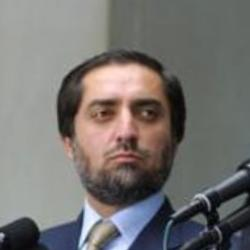

In [26]:
P1

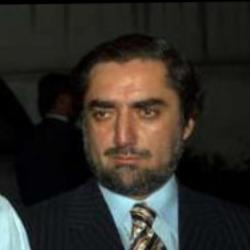

In [27]:
P2

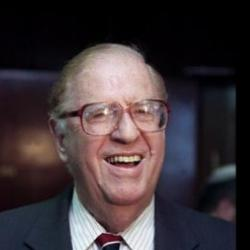

In [28]:
N1

In [29]:
P1 = np.asarray(P1)
P2 = np.asarray(P2)
N1 = np.asarray(N1)

In [30]:
def f_getFace(I):
    r = D.detect_faces(I) #returns tuple with lots of features
    x1,y1,w,h = r[0]['box'] #get features
    x2,y2 = x1+w,y1+h #we get top left cordinate
    face = I[y1:y2,x1:x2] #zoomed face
    return Image.fromarray(face)

In [31]:
f1 = f_getFace(P1).resize((224,224))
f2 = f_getFace(P2).resize((224,224))
f3 = f_getFace(N1).resize((224,224))

1/1 [==============================] - 0s 33ms/step


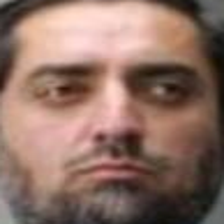

In [32]:
f1

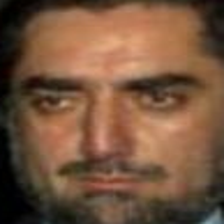

In [33]:
f2

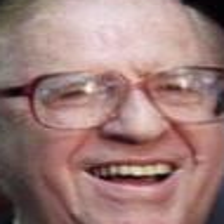

In [34]:
f3

In [15]:
f1 = np.asarray(f1,'float32') #back to array
f2 = np.asarray(f2,'float32')
f3 = np.asarray(f3,'float32')

In [16]:
f1 = preprocess_input(f1,version=2)
f2 = preprocess_input(f2,version=2)
f3 = preprocess_input(f3,version=2)

In [17]:
f1.shape

(224, 224, 3)

In [18]:
PE1 = model.predict(f1[np.newaxis,...]) #(1,224,224,3)
PE2 = model.predict(f2[np.newaxis,...])
NE3 = model.predict(f3[np.newaxis,...])

1/1 [==============================] - 0s 30ms/step


In [19]:
PE1.shape

(1, 2048)

In [20]:
distance_pos = np.sum((PE1-PE2)**2)**0.5
distance_neg = np.sum((PE1-NE3)**2)**0.5

In [21]:
print(distance_pos,distance_neg)

79.26023938189311 142.53252781163673
